# AIDI1009-25W: Introduction to Neural Networks
## Assignment 1: Dataset Exploration and Regression

**Team Members:**
- Mohamed Niyaz
- Nitin John
- Thomas Britnell

**Due Date:** June 12, 2025

### Problem Statement
This assignment explores the Engineering Graduate Salary dataset to apply data preprocessing and regression techniques in order to predict candidate salaries.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load dataset
#path = "C:\Users\niyaz\Downloads\Engineering_graduate_salary.csv"

path = "Engineering_graduate_salary.csv"
df = pd.read_csv(path)
df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [48]:
print(f"{df.shape[0]} rows and {df.shape[1]} columns\n\n")

2998 rows and 34 columns




In [49]:
df.describe()

,ID,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2.998000e+03,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,6.648926e+05,77.666264,2008.080720,74.341061,5210.210807,1.924616,71.509857,5210.210807,0.296197,2011.939960,...,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05
std,3.648951e+05,10.002785,1.631814,11.120299,4776.609877,0.264053,8.122462,4776.609877,0.456655,36.780582,...,99.785138,86.054739,103.552963,32.241501,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05
min,1.124400e+04,43.000000,1998.000000,40.000000,2.000000,1.000000,6.630000,2.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,3.334648e+05,71.140000,2007.000000,66.000000,526.250000,2.000000,66.530000,526.250000,0.000000,2012.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,6.396945e+05,78.965000,2008.000000,74.000000,4027.500000,2.000000,71.800000,4027.500000,0.000000,2013.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,9.951770e+05,85.600000,2009.000000,82.600000,8822.250000,2.000000,76.300000,8822.250000,1.000000,2014.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,1.297877e+06,97.760000,2012.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,...,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


In [50]:
print(f"null values in data? : {df.isnull().sum().any()}")

null values in data? : False


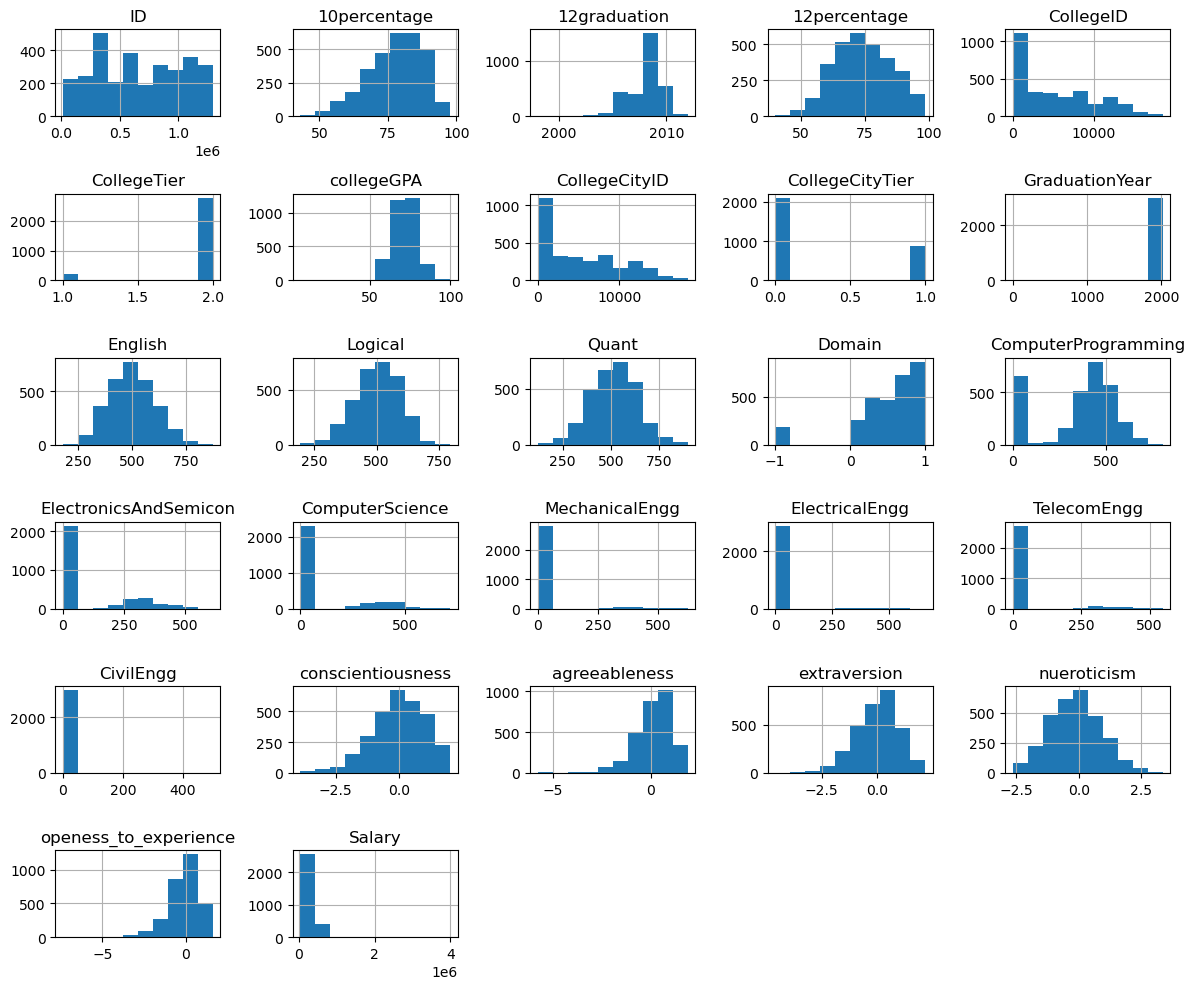

In [51]:
#these histograms show how each feature is distributed
df.hist(figsize=(12, 10)) 
plt.tight_layout()
plt.show()

### Data Cleaning

In [52]:
# There are no null values in the data so imputation/removal isn't needed


# We could potentially use these by transforming them, ie. replacing the schoolID with the average grades at that school,
# althought this might be beyond the scope of this assignment. These columns are too variable to encode categorically.
# Therefore we will drop them for simplicity. 
col_to_drop = ['ID', '10board', '12board', 'CollegeID', 'CollegeCityID', 'CollegeState']


df_clean = df.drop(columns=col_to_drop)
print(df.shape[1], "columns before\n")
print(df_clean.shape[1], "columns after")

34 columns before

28 columns after


### Visualizations: DOB and 12percentage Distributions

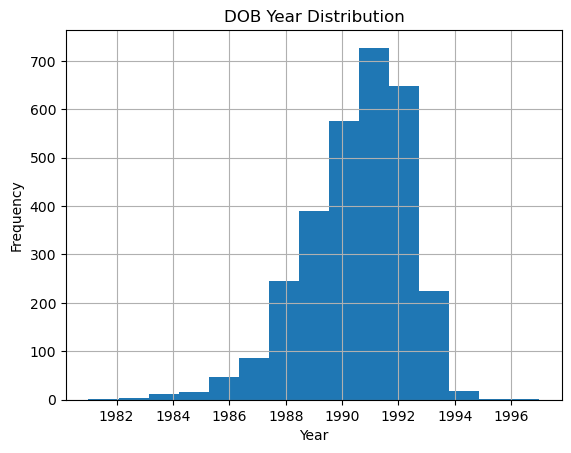

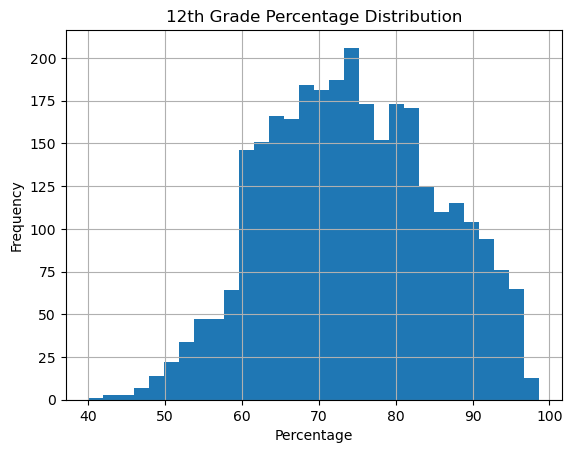

In [53]:
df_clean['DOB'] = pd.to_datetime(df_clean['DOB'], errors='coerce')
df_clean['DOB_Year'] = df_clean['DOB'].dt.year
plt.hist(df_clean['DOB_Year'].dropna(), bins=15)
plt.title('DOB Year Distribution')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid()
plt.show()

plt.hist(df_clean['12percentage'].dropna(), bins=30)
plt.title('12th Grade Percentage Distribution')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.grid()
plt.show()

### Pairwise Relationships

### Heatmap

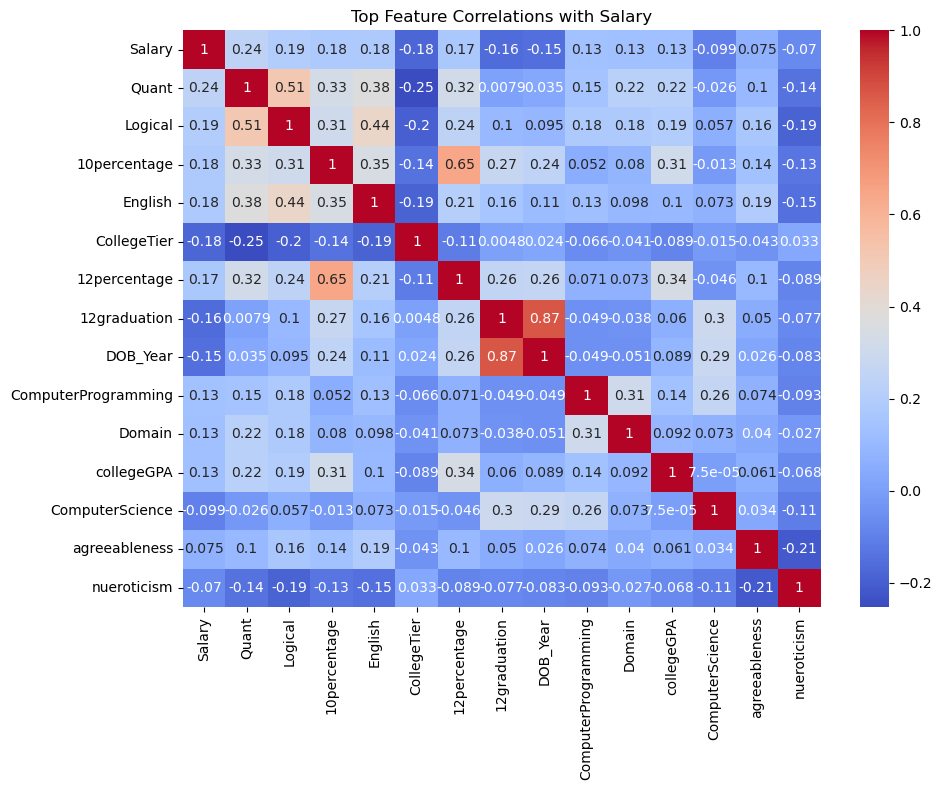

In [54]:
numeric_df = df_clean.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

#because the correlation matrix is so big we are only doing the top 15 by correlation with the target (salary)
top_features = correlation_matrix['Salary'].abs().sort_values(ascending=False).head(15).index
top_corr = correlation_matrix.loc[top_features, top_features]

plt.figure(figsize=(10, 8))
sns.heatmap(top_corr, annot=True, cmap='coolwarm')
plt.title('Top Feature Correlations with Salary')
plt.tight_layout()
plt.show()

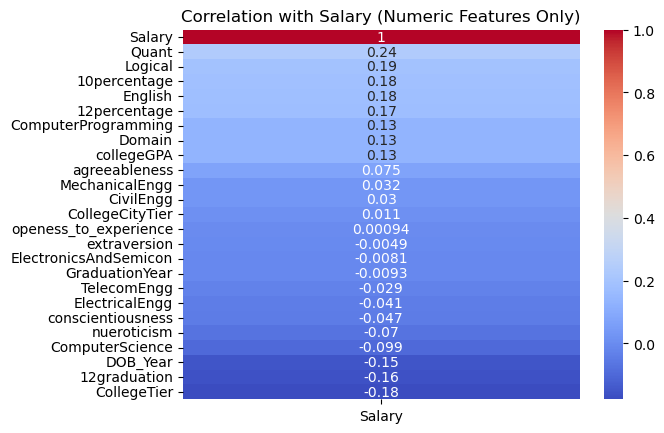

In [55]:
corr = numeric_df.corr()
sns.heatmap(corr[['Salary']].sort_values(by='Salary', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Salary (Numeric Features Only)')
plt.show()

### Data Transformation

In [56]:
X = df_clean.drop(columns=['Salary','DOB'])
y = df_clean['Salary']


# scale numeric features
scaler = StandardScaler()

X_scaled_numeric = scaler.fit_transform(X.select_dtypes(include=[np.number]))
X_scaled_numeric = pd.DataFrame(X_scaled_numeric, columns=X.select_dtypes(include=[np.number]).columns)
X_encoded_categorical = pd.get_dummies(X.select_dtypes(exclude=[np.number]))


X_prepared = pd.concat([X_scaled_numeric, X_encoded_categorical], axis=1)

# 80% 20% split
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=2)

### Linear Regression (Sampled Features)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

MSE: 51677887418.89
RMSE: 227327.71
